In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
# Librairies nécessaires

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

In [10]:
# setting working Directory
import os
os.chdir('/kaggle/input/folder-cat-dog-data/cat_dog_image_classification/Cat_Dog_data')

In [11]:
# Affichage le contenu du chemin d'accès
%ls

test/  train/


In [ ]:
# extract Cat_Dog_data.zip
#!unzip Cat_Dog_data.zip

In [13]:
data_dir = '/kaggle/input/folder-cat-dog-data/cat_dog_image_classification/Cat_Dog_data/train'

transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])# TODO: compose transforms here
dataset = datasets.ImageFolder(data_dir, transform=transform) # TODO: create the ImageFolder
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True) # TODO: use the ImageFolder dataset to create the DataLoader

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

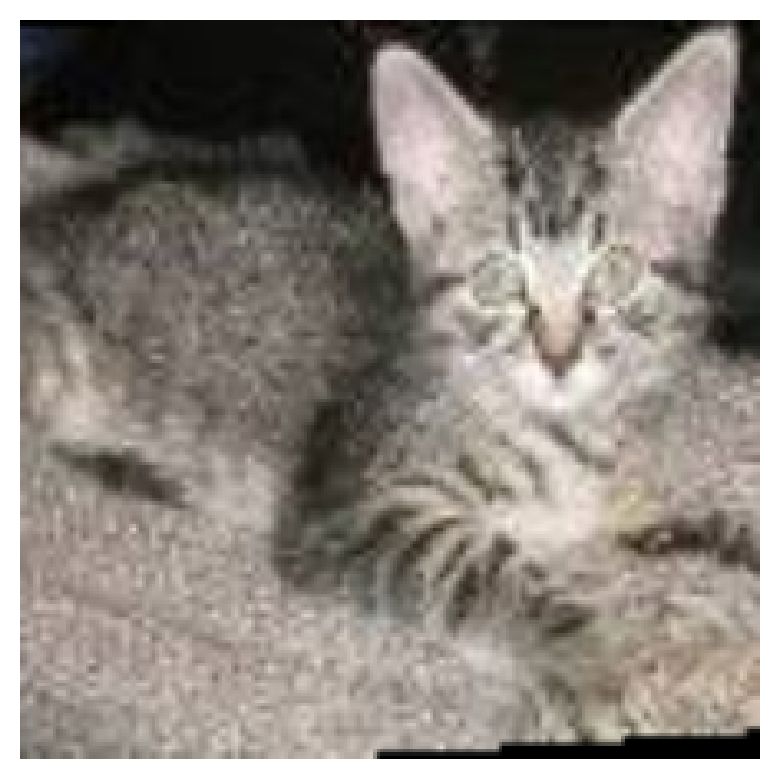

In [16]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)

In [17]:
data_dir = '/kaggle/input/folder-cat-dog-data/cat_dog_image_classification/Cat_Dog_data'

# Définition des statistiques de normalisation standard pour ImageNet
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std) # Normalisation!
])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = False)

In [19]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

In [20]:
images, labels = next(data_iter)
labels

tensor([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0])

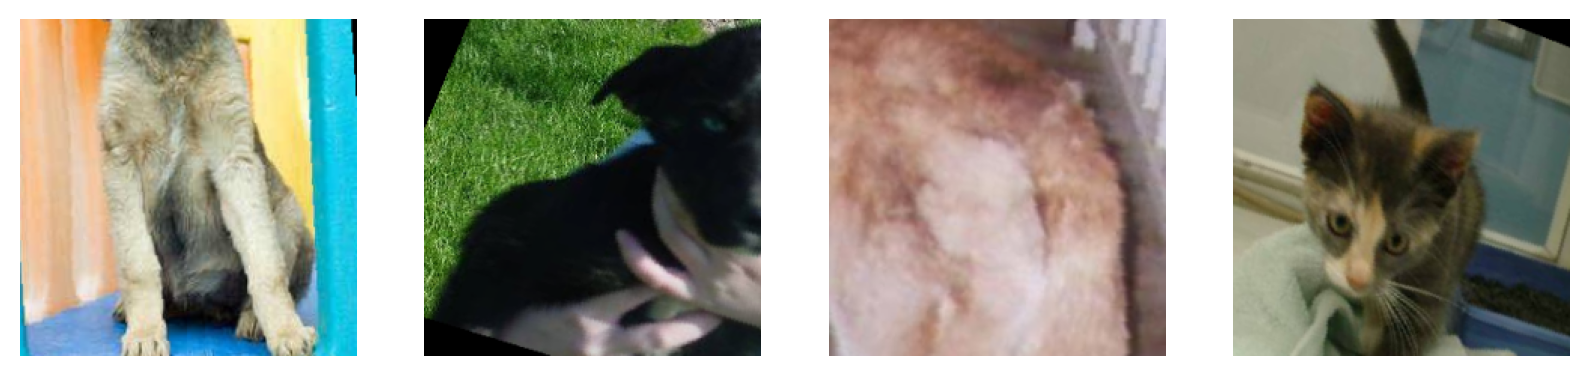

In [21]:
images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize= True)

In [ ]:
#  TODO: Attempt to build a network with CNN to classify cats vs dogs from this dataset
# --- créer un model from scratc

# TP – CNN “from scratch” vs Transfert Learning (Cats vs Dogs)

## Objectif

Comparer **un modèle CNN entraîné from scratch** et **un modèle en transfert d’apprentissage** sur le même jeu de données (cats vs dogs). Montrer l’impact du transfert learning sur la convergence, la performance et la robustesse.

## Ce qui est **obligatoire**

1. **Deux expériences distinctes**

   * Expérience A : CNN **from scratch** (architecture simple minimum 3 bloc avec conv).
   * Expérience B : **Transfert learning** (ex. ResNet, MobileNet, EfficientNet…), couches finales adaptées.
2. **Bonnes pratiques de régularisation**

   * Utiliser **Dropout** ET **Batch Normalization** (justifier où et pourquoi).
3. **Suivi des métriques**

   * **Training loss**, **Accuracy**, **Précision**, **Recall** à chaque époque (et idéalement sur train/val si vous faites une validation).
   * Tracer des **courbes** et **comparer** les deux approches.
4. **Optimisation**

   * Tester au moins **2 optimiseurs** (ex. SGD et Adam).
   * Chercher un **bon learning rate** (essais ou scheduler).
5. **GPU**

   * Entraîner **sur GPU** si disponible (vérification et mention dans README).
6. **Persistance du modèle**

   * **Sauvegarder** le meilleur modèle (.pt/.pth) localement (ne **pas** pousser dans GitHub).
   * **Recharger** le modèle pour faire le **test final** et rapporter les métriques.
7. **Reproductibilité**

   * Fixer un **seed**

## Ce qui est **souhaité (bonus)**

* **Split train/validation** (clair et justifié).
* **Data augmentation** raisonnable.
* **Scheduler** (ex. StepLR, CosineAnnealingLR).
* **Matrice de confusion** et quelques **erreurs typiques** commentées.
* Journalisation (TensorBoard/W&B) — sans pousser les fichiers lourds.

## Données

* Utilisez le même corpus **Cats vs Dogs** que vu en cours (ou équivalent).
* Ne **poussez pas** les données sur GitHub. Indiquez seulement **comment** les télécharger/placer.

## Structure du dépôt GitHub (exemple)

```
cnn-catsdogs-<NomPrenom>/
├─ notebook.ipynb
├─ .gitignore
├─ requirements.txt (ou environment.yml)
├─ README.md
└─ LICENSE (optionnel)
```

### `.gitignore` (minimum)

```
data/
*.pt
*.pth
runs/
checkpoints/
```

## Contenu attendu du **README.md**

* **Titre & objectif** du projet.
* **Environnement** ( `pip install -r requirements.txt` ou `conda env create -f environment.yml`).
* **Organisation des données** (où télécharger, où placer les dossiers).
* **Commandes pour entraîner** :

  * From scratch : arguments clés (batch size, lr, epochs, optimiser, dropout, BN, scheduler…).
  * Transfert learning : même chose + quelle base (gel des couches ou fine-tuning).
* **Commandes pour évaluer / recharger le modèle** (chemin du checkpoint local).
* **Résultats** : tableaux + courbes (loss/accuracy/précision/recall) pour les deux expériences, **comparaison et analyse** (2–3 paragraphes).
* **Limites & pistes d’amélioration** (brèves).

## Évaluation (grille indicative)

* Rigueur expérimentale & métriques (30 %)
* Qualité des modèles & optimisation (25 %)
* Clarté du code & structure du dépôt (20 %)
* README (reproductibilité, analyse, figures) (20 %)
* Bonus (val split, augmentation, scheduler, confusion matrix) (5 %)

## Remise

* **Poussez votre code sur GitHub** (sans données ni modèles).
* Envoyez **le lien du dépôt** à **[diallomous@gmail.com](mailto:diallomous@gmail.com)**
* **Date limite : mercredi  22 octobre 2025 à 18:00 (Africa/Dakar).**

> Rappel : ne chargez pas les fichiers lourds (datasets, `.pt/.pth`). Assurez-vous que votre dépôt permet de **reproduire** les expériences via les instructions du README.


## 1. Initialisation et adaptation Kaggle CPU

In [ ]:
# Configuration de l'environnement GPU(device) et les chemins de données

import matplotlib.pyplot as plt
import numpy as np
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import helper # (Assurez-vous que ce fichier est dans votre dépôt)

# --- 1. Adaptation Kaggle/GPU ---
# Définir le périphérique (GPU si disponible, sinon CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du périphérique: {device}")

# --- 2. Adaptation Chemins de Données Kaggle ---

# Pour ce TP, nous avons structuré 'Cat_Dog_data' avec 'train' et 'test'.
base_dir = '/kaggle/input/folder-cat-dog-data/cat_dog_image_classification/Cat_Dog_data' # Lien du dossier zipper que nous avons copié sur Kaggle
train_data_dir = os.path.join(base_dir, 'train')
test_data_dir = os.path.join(base_dir, 'test')


# --- 3. Initialisation des historiques (pour le tracé) ---
# Expérience A (Scratch)
test_loss_history = []
test_acc_history = []
test_precision_history = []
test_recall_history = []
train_loss_history = [] 

# Expérience B (Transfer Learning)
tl_test_loss_history = []
tl_test_acc_history = []
tl_test_precision_history = []
tl_test_recall_history = []
tl_train_loss_history = []

Utilisation du périphérique: cuda:0


## 2. Chargement des données et transformations

In [2]:
# Moyennes et écarts-types ImageNet pour VGG-16, utilisés pour la normalisation
MEAN = [0.485, 0.456, 0.406] 
STD = [0.229, 0.224, 0.225]

# Transformations pour l'entraînement (avec augmentation de données)
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD) # Normalisation recommandée
])

# Transformations pour le test (uniquement redimensionnement/recadrage et normalisation)
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD)
])

# Chargement des données
train_data = datasets.ImageFolder(train_data_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_data_dir, transform=test_transforms)

# DataLoaders (batch_size=32 utilisé dans le TP)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

## 3. Définition du CNN from scratch (expérience A)

Ceci est le modèle du CNN

In [3]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        
        # Le CNN doit avoir minimum 3 blocs conv.
        self.features = nn.Sequential(
            # Bloc 1
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16), # Utilisation de Batch Normalization
            nn.MaxPool2d(2, 2), # Sortie 112x112
            
            # Bloc 2
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), # Sortie 56x56
            
            # Bloc 3
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2)  # Sortie 28x28
        )
        
        # Couches de classification
        # La taille d'entrée est 64 * 28 * 28 = 50176
        self.classifier = nn.Sequential(
            nn.Linear(64 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.5), # Utilisation de Dropout
            nn.Linear(512, 2) # 2 classes : Chat et Chien
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1) # Aplatir pour les couches linéaires
        x = self.classifier(x)
        return x

# Instanciation et déplacement du modèle A vers le GPU
model = MyCNN()
model.to(device)

MyCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=50176, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_feat

## 4. Fonction d'entraînement et d'évaluation

In [5]:
def calculate_metrics(y_true, y_pred):
    """Calcule l'accuracy, la precision et le recall."""
    acc = accuracy_score(y_true, y_pred)
    # Utilisez 'binary' pour la classification à 2 classes (même si c'est multi-classe discret)
    # ou 'weighted' si vous avez un déséquilibre. 'macro' est souvent un bon choix par défaut.
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0) 
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    return acc, prec, rec

def train_and_validate(model, trainloader, testloader, optimizer, criterion, epochs, history_prefix=""):
    start_total_time = time.time()
    
    # Références aux historiques globaux pour le stockage
    if history_prefix == "tl_":
        loss_hist = tl_test_loss_history
        acc_hist = tl_test_acc_history
        prec_hist = tl_test_precision_history
        rec_hist = tl_test_recall_history
        train_loss_hist = tl_train_loss_history
    else:
        loss_hist = test_loss_history
        acc_hist = test_acc_history
        prec_hist = test_precision_history
        rec_hist = test_recall_history
        train_loss_hist = train_loss_history

    for epoch in range(epochs):
        start_epoch_time = time.time()
        model.train()
        epoch_train_loss = 0
        
        # --- Boucle d'entraînement ---
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device) # Déplacement vers GPU/device
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_train_loss += loss.item() * images.size(0)
            
        epoch_train_loss /= len(trainloader.dataset)
        train_loss_hist.append(epoch_train_loss)
        
        # --- Boucle de validation/test ---
        model.eval()
        test_loss = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device) # Déplacement vers GPU/device
                
                outputs = model(images)
                test_loss += criterion(outputs, labels).item() * images.size(0)
                
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_test_loss = test_loss / len(testloader.dataset)
        
        test_accuracy, test_precision, test_recall = calculate_metrics(all_labels, all_preds)

        # Stockage de l'historique
        loss_hist.append(epoch_test_loss)
        acc_hist.append(test_accuracy)
        prec_hist.append(test_precision)
        rec_hist.append(test_recall)
        
        # Affichage des résultats
        print(f"{history_prefix.upper()}Epoch {epoch+1}/{epochs} | Temps total: {time.time() - start_total_time:.2f}s")
        print(f"  Train Loss: {epoch_train_loss:.4f}")
        print(f"  Test Loss: {epoch_test_loss:.4f} | Acc: {test_accuracy:.4f} | Prec: {test_precision:.4f} | Rec: {test_recall:.4f}")

    print(f"\nEntraînement de l'Expérience {history_prefix.upper()} (Adam) terminé.")
    return all_labels, all_preds

## 5. Expérience A : Entraînement from Scratch

In [6]:
print("\n--- Début de l'Expérience A : CNN from scratch ---")

# Définition du Loss et de l'Optimiseur pour le CNN
criterion_a = nn.CrossEntropyLoss()
optimizer_a = optim.Adam(model.parameters(), lr=0.001)

# Entraînement (10 époques comme dans le TP)
epochs_a = 10
labels_a, preds_a = train_and_validate(model, trainloader, testloader, optimizer_a, criterion_a, epochs_a, history_prefix="")


--- Début de l'Expérience A : CNN from scratch ---
Epoch 1/10 | Temps total: 205.51s
  Train Loss: 0.9556
  Test Loss: 0.6435 | Acc: 0.6204 | Prec: 0.6265 | Rec: 0.6204
Epoch 2/10 | Temps total: 351.72s
  Train Loss: 0.6603
  Test Loss: 0.6303 | Acc: 0.6280 | Prec: 0.6890 | Rec: 0.6280
Epoch 3/10 | Temps total: 496.30s
  Train Loss: 0.6515
  Test Loss: 0.5873 | Acc: 0.6996 | Prec: 0.7005 | Rec: 0.6996
Epoch 4/10 | Temps total: 640.25s
  Train Loss: 0.6384
  Test Loss: 0.5605 | Acc: 0.7012 | Prec: 0.7515 | Rec: 0.7012
Epoch 5/10 | Temps total: 783.81s
  Train Loss: 0.6282
  Test Loss: 0.5407 | Acc: 0.7316 | Prec: 0.7463 | Rec: 0.7316
Epoch 6/10 | Temps total: 927.70s
  Train Loss: 0.6177
  Test Loss: 0.5246 | Acc: 0.7576 | Prec: 0.7581 | Rec: 0.7576
Epoch 7/10 | Temps total: 1074.20s
  Train Loss: 0.6120
  Test Loss: 0.5259 | Acc: 0.7516 | Prec: 0.7711 | Rec: 0.7516
Epoch 8/10 | Temps total: 1220.03s
  Train Loss: 0.6078
  Test Loss: 0.4872 | Acc: 0.7688 | Prec: 0.7727 | Rec: 0.7688
Ep

## 6. Expérience B : Transfer Learning (VGG-16)

In [7]:
print("\n--- Début de l'Expérience B : Transfer Learning (VGG-16) ---")

# Chargement du modèle VGG-16 pré-entraîné
model_transfer = models.vgg16(weights='IMAGENET1K_V1')

# 1. Geler les paramètres (Feature Extractor)
for param in model_transfer.parameters():
    param.requires_grad = False

# 2. Remplacer le classifieur final pour notre tâche (2 classes)
# La dernière couche du classifieur VGG-16 est model_transfer.classifier[6]
num_ftrs = model_transfer.classifier[6].in_features 

# Créer un nouveau classifieur, en conservant le Dropout et la couche Linear intermédiaire
model_transfer.classifier[6] = nn.Linear(num_ftrs, 2)

# 3. Déplacer le modèle vers le GPU
model_transfer.to(device)

# 4. Définition du Loss et de l'Optimiseur 
criterion_b = nn.CrossEntropyLoss()

# Entraîner UNIQUEMENT les paramètres qui NE SONT PAS gelés (le nouveau classifieur)
optimizer_b = optim.Adam(model_transfer.classifier.parameters(), lr=0.001) 

# Entraînement (10 époques)
epochs_b = 10
labels_b, preds_b = train_and_validate(model_transfer, trainloader, testloader, optimizer_b, criterion_b, epochs_b, history_prefix="tl_")


--- Début de l'Expérience B : Transfer Learning (VGG-16) ---


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 226MB/s]  


TL_Epoch 1/10 | Temps total: 246.35s
  Train Loss: 0.1576
  Test Loss: 0.0382 | Acc: 0.9856 | Prec: 0.9857 | Rec: 0.9856
TL_Epoch 2/10 | Temps total: 490.70s
  Train Loss: 0.1664
  Test Loss: 0.0324 | Acc: 0.9852 | Prec: 0.9852 | Rec: 0.9852
TL_Epoch 3/10 | Temps total: 734.14s
  Train Loss: 0.1647
  Test Loss: 0.0351 | Acc: 0.9856 | Prec: 0.9856 | Rec: 0.9856
TL_Epoch 4/10 | Temps total: 976.97s
  Train Loss: 0.1751
  Test Loss: 0.0367 | Acc: 0.9856 | Prec: 0.9856 | Rec: 0.9856
TL_Epoch 5/10 | Temps total: 1221.40s
  Train Loss: 0.1678
  Test Loss: 0.0361 | Acc: 0.9880 | Prec: 0.9880 | Rec: 0.9880
TL_Epoch 6/10 | Temps total: 1465.38s
  Train Loss: 0.1759
  Test Loss: 0.0374 | Acc: 0.9860 | Prec: 0.9861 | Rec: 0.9860
TL_Epoch 7/10 | Temps total: 1709.30s
  Train Loss: 0.1794
  Test Loss: 0.0382 | Acc: 0.9860 | Prec: 0.9860 | Rec: 0.9860
TL_Epoch 8/10 | Temps total: 1952.81s
  Train Loss: 0.1820
  Test Loss: 0.0349 | Acc: 0.9880 | Prec: 0.9880 | Rec: 0.9880
TL_Epoch 9/10 | Temps total:

## 7. Tracé des résultats de comparaison

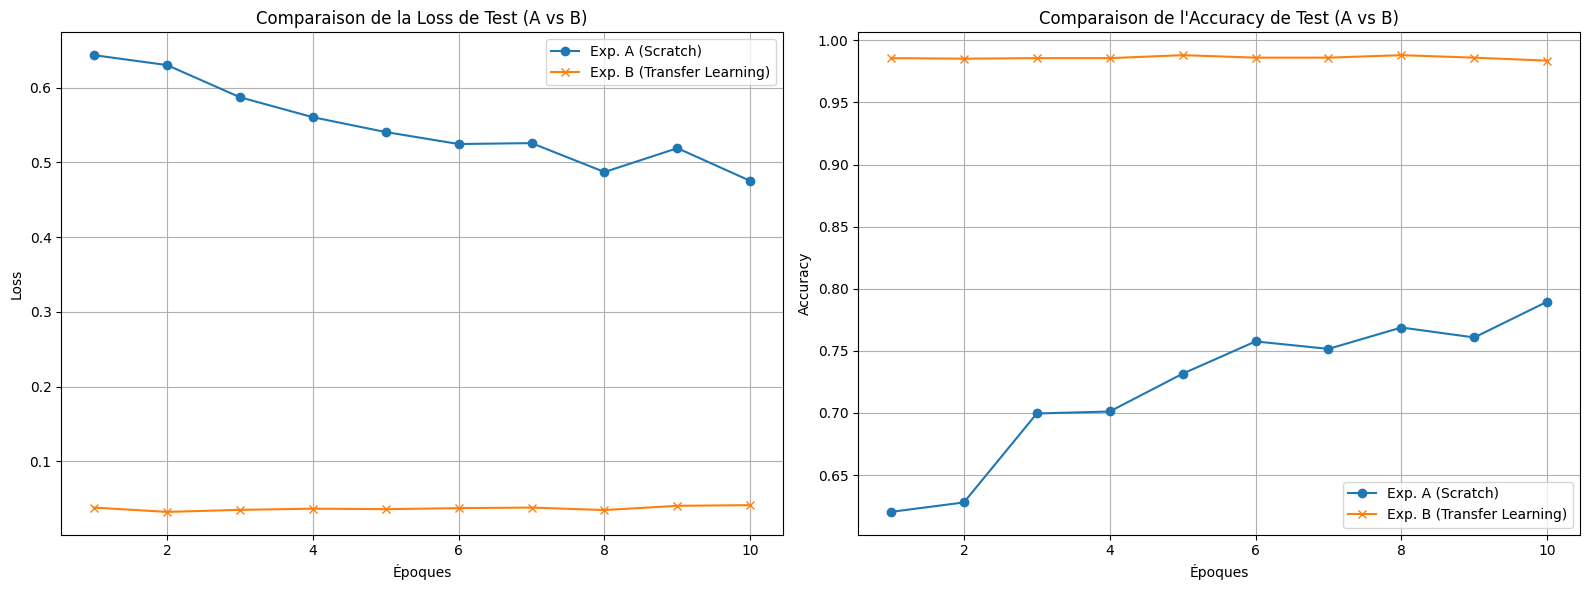

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
epochs_a = range(1, len(test_loss_history) + 1)
epochs_b = range(1, len(tl_test_loss_history) + 1)

# Courbe de Loss (Test)
axes[0].plot(epochs_a, test_loss_history, label='Exp. A (Scratch)', marker='o')
axes[0].plot(epochs_b, tl_test_loss_history, label='Exp. B (Transfer Learning)', marker='x')
axes[0].set_title('Comparaison de la Loss de Test (A vs B)')
axes[0].set_xlabel('Époques')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Courbe d'Accuracy (Test)
axes[1].plot(epochs_a, test_acc_history, label='Exp. A (Scratch)', marker='o')
axes[1].plot(epochs_b, tl_test_acc_history, label='Exp. B (Transfer Learning)', marker='x')
axes[1].set_title('Comparaison de l\'Accuracy de Test (A vs B)')
axes[1].set_xlabel('Époques')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Enregistrez les figures pour le README.md
fig.savefig('comparison_metrics.png')

## 8. Génération de la matrice de confusion (Bonus)

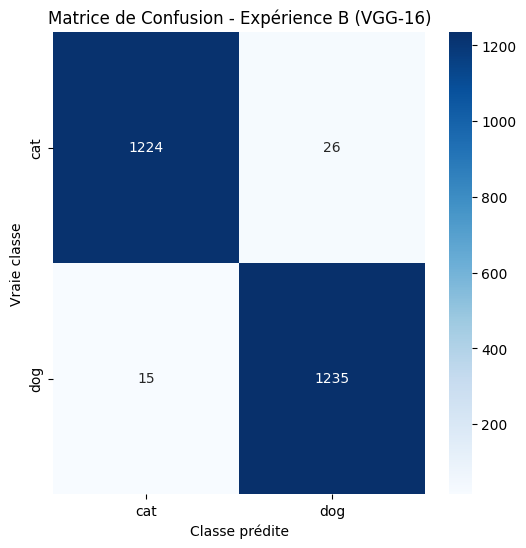

<Figure size 640x480 with 0 Axes>

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice pour l'Expérience B (le meilleur modèle)
cm = confusion_matrix(labels_b, preds_b)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.classes, yticklabels=test_data.classes)
plt.title('Matrice de Confusion - Expérience B (VGG-16)')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

plt.savefig('confusion_matrix_B.png')